<a href="https://colab.research.google.com/github/sm1899/ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np


In [14]:
url = "student_data.csv"
student_data = pd.read_csv(url)

# 1. Identify the dependent and independent variables

In [15]:
print(student_data.columns)
student_data

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Duration of Sleep', 'Sample Question Papers Practiced', 'Performance'],
      dtype='object')


,Hours Studied,Previous Scores,Extracurricular Activities,Duration of Sleep,Sample Question Papers Practiced,Performance
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95


In [16]:
# independent variables
X = student_data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Duration of Sleep', 'Sample Question Papers Practiced']]
# dependent variables
y =  student_data[["Performance"]]
print("Independent variables: ",list(X.columns))
print("Dependent variables: ",list(y.columns))

Independent variables:  ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Duration of Sleep', 'Sample Question Papers Practiced']
Dependent variables:  ['Performance']


# 2. Read the dataset and do exploratory data analysis. (Data Preprocessing and meaningful plots)

In [17]:
#data preprosessing
#cheack for NAN

student_data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Duration of Sleep                   0
Sample Question Papers Practiced    0
Performance                         0
dtype: int64

In [18]:
# categorical to numerical

print(student_data["Extracurricular Activities"].value_counts())
mapping = {"Yes": 1, "No": 0} # Yes to 1 and No to 0
student_data["Extracurricular Activities"] = student_data["Extracurricular Activities"].map(mapping)
print(student_data["Extracurricular Activities"].value_counts())

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64
Extracurricular Activities
0    5052
1    4948
Name: count, dtype: int64


In [19]:
#summary stat

summary_stat = student_data.describe()
summary_stat

,Hours Studied,Previous Scores,Extracurricular Activities,Duration of Sleep,Sample Question Papers Practiced,Performance
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


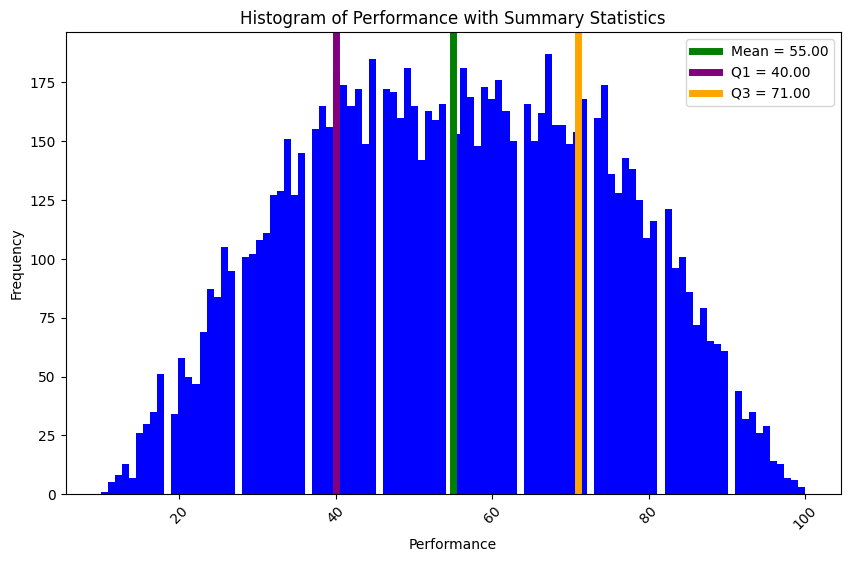

In [20]:
# Generate a histogram with summary statistics for the data 'y'

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram with 100 bins, represented in blue color
plt.hist(y, bins=100, color='blue')

# Calculate summary statistics
mean_val = np.percentile(y, 50)
q1_val = np.percentile(y, 25)
q3_val = np.percentile(y, 75)

# Add vertical lines for mean, Q1, and Q3 values
plt.axvline(mean_val, color='green', linestyle='-', linewidth=5, label=f'Mean = {mean_val:.2f}')
plt.axvline(q1_val, color='purple', linestyle='-', linewidth=5, label=f'Q1 = {q1_val:.2f}')
plt.axvline(q3_val, color='orange', linestyle='-', linewidth=5, label=f'Q3 = {q3_val:.2f}')

# Set plot title, x-axis label, and y-axis label
plt.title('Histogram of Performance with Summary Statistics')
plt.xlabel('Performance')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend to identify the lines
plt.legend()

# Show the plot
plt.show()






# Scatter Plots of Features vs. Performance



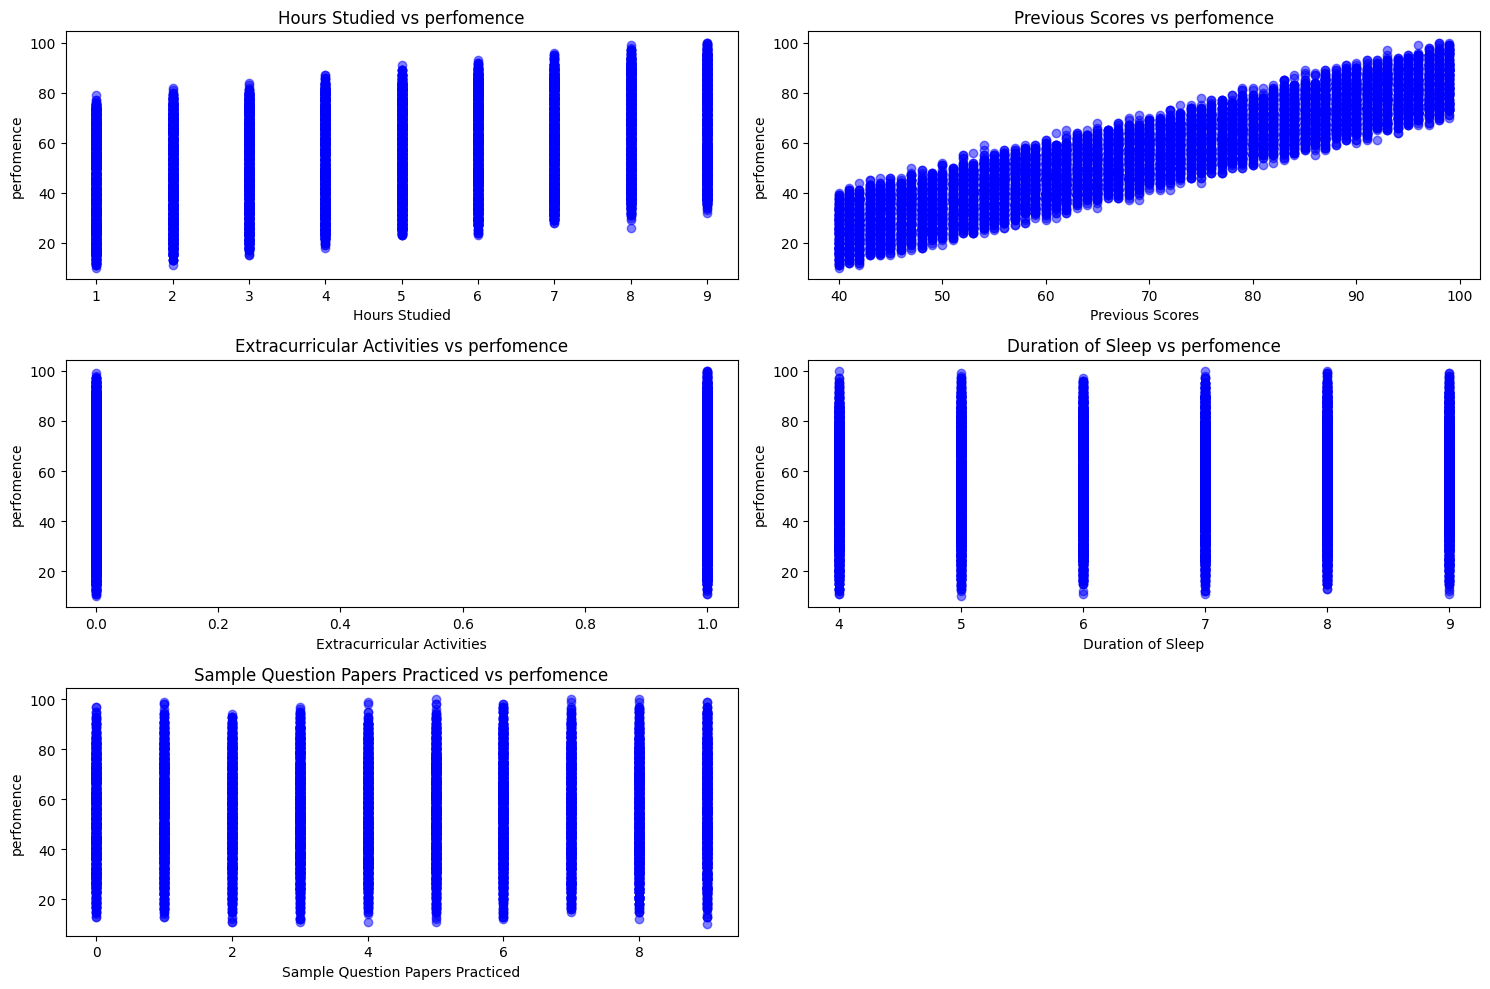

In [21]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(list(X.columns), 1):
    plt.subplot(3, 2, i)  # 2 rows, 3 col
    plt.scatter(student_data[col],y, alpha=0.5,color='blue')
    plt.title(f'{col} vs perfomence')
    #plt.xticks(student_data[col].unique())
    plt.xlabel(col)
    plt.ylabel("perfomence")


plt.tight_layout()
plt.show()


## Collaborative Visualization: Unveiling Insights with a Vibrant Correlation Matrix of Student Data

<Figure size 800x600 with 0 Axes>

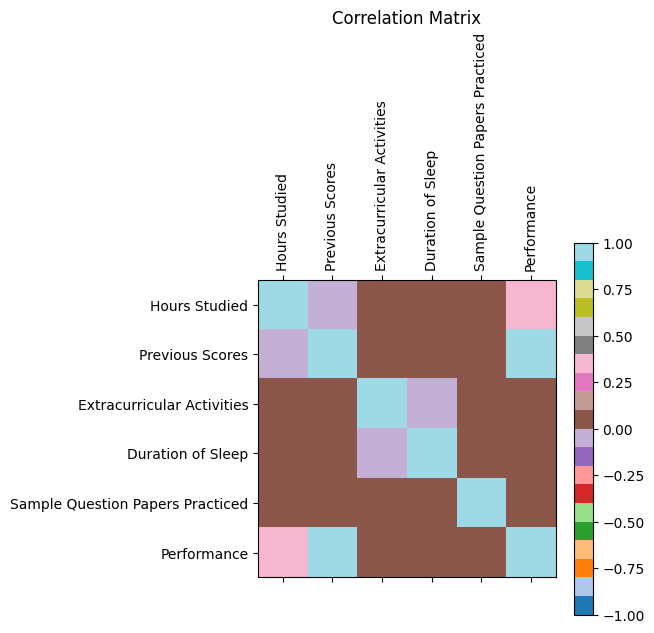

,Hours Studied,Previous Scores,Extracurricular Activities,Duration of Sleep,Sample Question Papers Practiced,Performance
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Duration of Sleep,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


In [22]:
corr_matrix = student_data.corr()

plt.figure(figsize=(8, 6))
cax = plt.matshow(corr_matrix, cmap='tab20' ,vmin=-1, vmax=1)# cmap='coolwarm'
plt.colorbar(cax)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

corr_matrix


# Data stanardaization

In [23]:
# StandardScaler Class Documentation

class StandardScaler:
    """
    StandardScaler is a class for standardizing numerical data. It calculates the mean and standard deviation
    of the input data during the fitting process and then uses these statistics to transform the data.

    Attributes:
        mean (numpy.ndarray): The mean value for each feature calculated during the fitting process.
        std (numpy.ndarray): The standard deviation for each feature calculated during the fitting process.

    Methods:
        fit(X):
            Computes and sets the mean and standard deviation for each feature in the input data.

        transform(X):
            Standardizes the input data using the mean and standard deviation calculated during the fitting process.
            If fit has not been called before transform, a message is printed suggesting to call fit first.

    Usage Example:
        # Create an instance of StandardScaler
        scaler = StandardScaler()

        # Fit the scaler on the specified columns of the data
        cols_to_normalize = ['Hours Studied', 'Previous Scores', 'Duration of Sleep', 'Sample Question Papers Practiced']
        scaler.fit(student_data[cols_to_normalize])

        # Transform the specified columns in the data using the fitted scaler
        student_data[cols_to_normalize] = scaler.transform(student_data[cols_to_normalize])
    """

    def __init__(self):
        """
        Initializes a StandardScaler instance with empty mean and standard deviation attributes.
        """
        self.mean = None
        self.std = None

    def fit(self, X):
        """
        Computes the mean and standard deviation of each feature in the input data.

        Parameters:
            X (numpy.ndarray): Input data with features to calculate mean and standard deviation.

        Returns:
            None
        """
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        """
        Standardizes the input data using the mean and standard deviation calculated during fitting.

        Parameters:
            X (numpy.ndarray): Input data to be standardized.

        Returns:
            numpy.ndarray: Standardized data.
        """
        if self.mean is None or self.std is None:
            print("call fit")

        scaled_X = (X - self.mean) / self.std
        return scaled_X

# Example Usage:

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the specified columns of the data
cols_to_normalize = ['Hours Studied', 'Previous Scores', 'Duration of Sleep', 'Sample Question Papers Practiced']
scaler.fit(student_data[cols_to_normalize])

# Transform the specified columns in the data using the fitted scaler
student_data[cols_to_normalize] = scaler.transform(student_data[cols_to_normalize])




student_data

,Hours Studied,Previous Scores,Extracurricular Activities,Duration of Sleep,Sample Question Papers Practiced,Performance
0,0.775188,1.704176,1,1.456205,-1.249754,91
1,-0.383481,0.723913,0,-1.492294,-0.900982,65
2,1.161410,-1.063626,1,0.276805,-0.900982,45
3,0.002742,-1.005963,1,-0.902594,-0.900982,36
4,0.775188,0.320275,0,0.866505,0.145333,66
...,...,...,...,...,...,...
9995,-1.542149,-1.178951,1,-1.492294,-0.900982,23
9996,0.775188,-0.314013,1,0.866505,0.145333,58
9997,0.388965,0.781575,1,0.866505,0.145333,74
9998,1.547633,1.588851,1,0.276805,-1.598526,95


# 3.Split the data set in train and test (80:20) ratio.

In [24]:
student_data = student_data.sample(frac=1, random_state=42)

train_ratio = 0.8
test_ratio = 0.2

total_samples = len(student_data)
train_samples = int(total_samples * train_ratio)
#test_samples = total_samples - train_samples

train_data = student_data[:train_samples]
test_data = student_data[train_samples:]

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

print(f"Number of samples in training set: {len(train_data)}")
print(f"Number of samples in testing set: {len(test_data)}")


Number of samples in training set: 8000
Number of samples in testing set: 2000


In [25]:
X_train = train_data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Duration of Sleep', 'Sample Question Papers Practiced']].values
y_train = train_data[["Performance"]].values.flatten()
X_test = test_data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Duration of Sleep', 'Sample Question Papers Practiced']].values
y_test = test_data[["Performance"]].values.flatten()
X_train[5]

array([ 1.54763324, -0.37167536,  0.        , -1.49229423,  0.84287677])

In [26]:
np.array(X_train,dtype=float)
np.array(y_train,dtype=float)



array([51., 20., 46., ..., 36., 90., 46.])

In [27]:
print(X_train.shape)

(8000, 5)


# 4.Write a python code for Linear Regression (from scratch) and train the model with training data. (Only numpy and pandas should be used)

The Code bellow is a Python implementation of linear regression using gradient descent. It includes functions for calculating Mean Squared Error (MSE), R-squared (r2_score), predicting values based on given weights (y_predict), performing gradient descent (gradient_descent), and updating weights through multiple iterations of training (weights). Here's a breakdown of each part:

### Functions:

#### 1. `MSE(y_true, y_pred)`
   - Calculates the Mean Squared Error between the true values (`y_true`) and predicted values (`y_pred`).
   - It converts inputs to NumPy arrays and then computes the squared errors, followed by taking the mean.

#### 2. `r2_score(y_true, y_pred)`
   - Computes the R-squared score, a measure of how well the predictions fit the actual values.
   - It calculates the total sum of squares (tss), residual sum of squares (rss), and then derives R-squared.

#### 3. `y_predict(w, x)`
   - Predicts the values (`y_pred`) based on given weights (`w`) and input features (`x`) using a simple linear regression model.

#### 4. `gradient_descent(y_actual, y_pred, x)`
   - Computes the gradient of the error with respect to the weights for the given actual and predicted values and input features.
   - This is a crucial step in updating the weights during the training process.

#### 5. `weights(x_train, y_train, num_iterations, learning_rate)`
   - Performs linear regression training using gradient descent.
   - Initializes weights, updates input features, iteratively calculates predictions and errors, and updates weights based on the gradient of the error.
   - Prints the mean square error after each iteration and stores them in the `MSE_points` list.

### Main Code:

- Initializes a list `MSE_points` to store Mean Squared Error values during training.
- Sets hyperparameters like `num_iterations` and `learning_rate`.
- Calls the `weights` function to obtain the optimized weights for the linear regression model.

### Example Usage:

```python
# Assuming X_train and y_train are your training data
import numpy as np

# Your data
X_train = np.array([[1, 2], [3, 4], [5, 6]])
y_train = np.array([3, 7, 11])

# Hyperparameters
num_iterations = 200
learning_rate = 0.1

# Training
w = weights(X_train, y_train, num_iterations, learning_rate)

# You can now use the obtained weights 'w' for making predictions on new data.
```

### Notes:
- It's essential to have NumPy installed (`import numpy as np`).
- The learning rate (`learning_rate`) is a hyperparameter that influences the size of steps taken during gradient descent. Adjusting it may be necessary for optimal performance.
- The code prints the mean square error after each iteration, providing insight into the convergence of the algorithm.

This code essentially represents a basic implementation of linear regression using gradient descent, and it's often used as a building block for more complex machine learning models.


In [28]:
def MSE(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    squared_errors = (y_true - y_pred) ** 2
    mse = np.mean(squared_errors)
    return mse


def r2_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mean_y_true = np.mean(y_true)
    tss = np.sum((y_true - mean_y_true) ** 2)
    rss = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (rss / tss)

    return r2



def y_predict(w, x):
    y_pred = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(len(w) - 1):
            y_pred[i] += w[j] * x[i][j]
        y_pred[i] += w[-1]
    return y_pred

def gradient_descent(y_actual,y_pred,x):
    grad = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        for j in range(0,len(y_actual)):
            grad[i] = - (y_actual[j] - y_pred[j])*x[j][i] + grad[i]
    return grad/len(y_actual)


def weights(x_train,y_train,num_iterations,learning_rate):
    rows = x_train.shape[0]
    cols = x_train.shape[1]
    update_x_train = np.ones((rows,cols+1))
    update_x_train[:,0:cols] = x_train
    w = np.zeros(cols)
    w =np.append(w,1)
    error = 0
    for i in range(0,num_iterations):
        y_pred = y_predict(w,update_x_train)
        error = MSE(y_train,y_pred)
        print("mean square error: ",error,"after",i,"th iteration")
        MSE_points.append(error)
        grad = gradient_descent(y_train,y_pred,update_x_train)
        w = w - learning_rate*grad
        #learning_rate = learning_rate/1.05
    print("mean square error: ",error,"at the end of the training")
    return w

MSE_points = []
num_iterations = 200
learning_rate = 0.1
w = weights(X_train,y_train,num_iterations,learning_rate)

mean square error:  3309.40975 after 0 th iteration
mean square error:  2550.8348792460188 after 1 th iteration
mean square error:  1973.0662945600347 after 2 th iteration
mean square error:  1532.586513898334 after 3 th iteration
mean square error:  1196.3983871982753 after 4 th iteration
mean square error:  939.4742895964707 after 5 th iteration
mean square error:  742.8251778098647 after 6 th iteration
mean square error:  592.0386176379136 after 7 th iteration
mean square error:  476.1716713975139 after 8 th iteration
mean square error:  386.912340013284 after 9 th iteration
mean square error:  317.94427721959084 after 10 th iteration
mean square error:  264.46538906617985 after 11 th iteration
mean square error:  222.82295219015148 after 12 th iteration
mean square error:  190.2369749282947 after 13 th iteration
mean square error:  164.59040109794913 after 14 th iteration
mean square error:  144.26995742547857 after 15 th iteration
mean square error:  128.04538050505897 after 16 th

In [29]:
#w1 = [ 2.20738527,  0.82730583, -0.66217472, -1.42320605, -0.24043819,-1.66931715] #without standardaization,epoch = 10000,lr = .0001
#w2 =[ 7.38240423, 17.66564527,  0.68875246,  0.81289791,  0.57668956, 54.86082434] with standardaization,epoch = 300,lr = .01

# 5.the loss vs epoch curve.

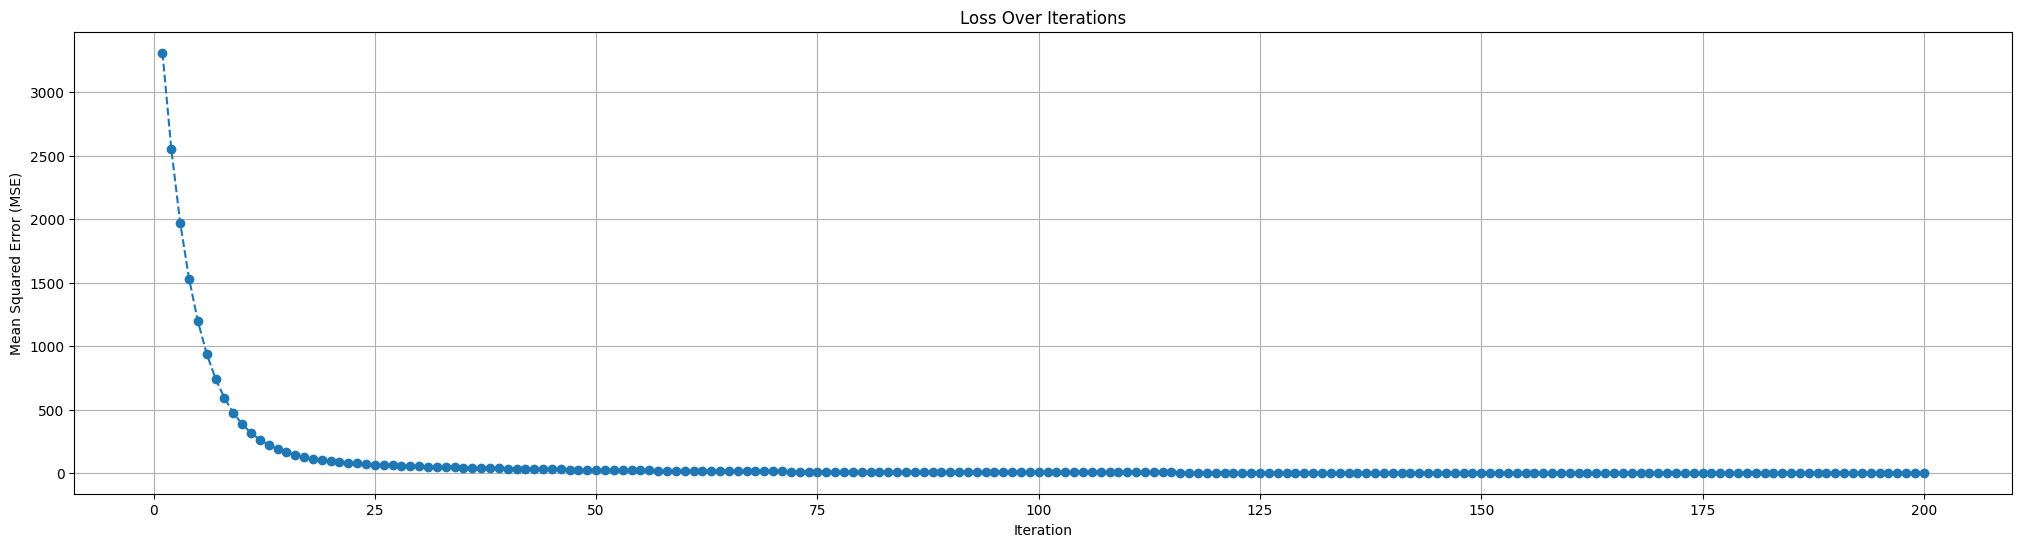

In [30]:

iterations = range(1, len(MSE_points) + 1)

# Plot the loss values
plt.figure(figsize=(25,6))
plt.plot(iterations, MSE_points, marker='o', linestyle='--')
plt.title('Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


# 6.Given a student’s data : [Hours of study = 7, Previous score = 95, Extracurricular Activities =Yes, Duration of Sleep = 7, Sample Question Papers Practiced = 6] What will be his/her performance

In [31]:
test_dict = {'Hours Studied':7, 'Previous Scores':95, 'Extracurricular Activities':'Yes', 'Duration of Sleep':7, 'Sample Question Papers Practiced':6}
test_df = pd.DataFrame.from_dict([test_dict])
test_df['Extracurricular Activities'] = test_df['Extracurricular Activities'].map({"Yes": 1, "No": 0})

cols_to_normalize = ['Hours Studied', 'Previous Scores',
       'Duration of Sleep', 'Sample Question Papers Practiced']

test_df[cols_to_normalize] = scaler.transform(test_df[cols_to_normalize])

test_data = test_df.values

y_pred =y_predict(w,test_data)
print("Predicted performence for the given data:",y_pred[0])



Predicted performence for the given data: 87.97551229426453


# 7.a.) MSE error b.) R2 Score**

In [32]:
y_pred = y_predict(w,X_test)
mse = MSE(y_test,y_pred)
print("MSE",mse)
r2 = r2_score(y_test,y_pred)
print("R-squared:", r2)


MSE 4.263584474326021
R-squared: 0.9886054437508285


# Comparing WIth Traditional libreies

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt





url = "student_data.csv"
student_data = pd.read_csv(url)

mapping = {"Yes": 1, "No": 0} # Yes to 1 and No to 0
student_data["Extracurricular Activities"] = student_data["Extracurricular Activities"].map(mapping)
# independent variables
X = student_data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Duration of Sleep', 'Sample Question Papers Practiced']]
# dependent variables
y =  student_data[["Performance"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

lr_reg = LinearRegression()

lr_reg.fit(X_train, y_train)

y_pred = lr_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

train_score = lr_reg.score(X_train, y_train)

from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)

print("Train score:", train_score)

print("Test Mean squared error: ", mse)
print("Test Mean absolute error: ", mae)
print("R-squared:", r2)


Train score: 0.9887714361018953
Test Mean squared error:  4.236045598233288
Test Mean absolute error:  1.6412162371989103
R-squared: 0.9886543202866286


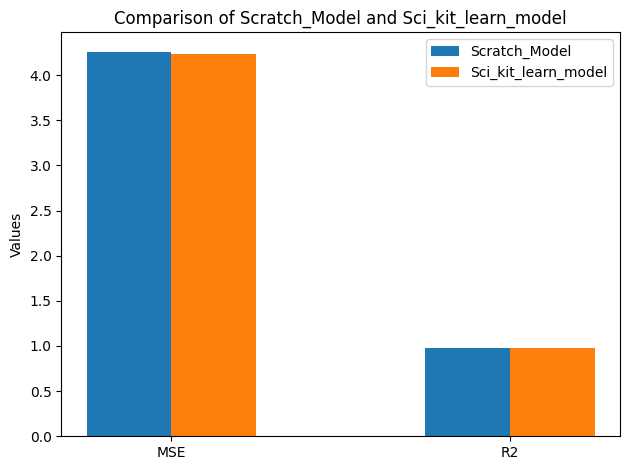

In [35]:
categories = ['MSE', 'R2']
Scratch_Model = [4.26, 0.98]
Sci_kit_learn_model = [4.23, 0.98]

bar_width = 0.25

x = np.arange(len(categories))
plt.bar(x - bar_width/2, Scratch_Model, bar_width, label='Scratch_Model', align='center')
plt.bar(x + bar_width/2, Sci_kit_learn_model, bar_width, label='Sci_kit_learn_model', align='center')
plt.xticks(x, categories)

plt.ylabel('Values')
plt.legend()
plt.title('Comparison of Scratch_Model and Sci_kit_learn_model')
plt.tight_layout()
plt.show()